# Analysis of monthly output by sector, 1997-2021

Aiming to make four graphs showing interesting things from the data:

* Total output - line graph
* Change in output on five sectors with biggest change - bar chart
* Boom and bust - which sectors decreased output after 2007 financial crisis - line graph
* Seasonal variability - find one sector which changes during the year - bar chart

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import numpy as np
from datetime import datetime

In [104]:
# Data source https://www.ons.gov.uk/economy/grossdomesticproductgdp/datasets/gdpmonthlyestimateuktimeseriesdataset
data = pd.read_csv('Monthly_gdp_timeseries.csv')

In [105]:
data.head()
# CDID is the list of four-letter codes used by the ONS
# Not clear what the units are

,Title,Service Industries - Total (Index 1dp) :CVM SA,Wholesale & retail trade; Repair of motor vehicles/cycles (Index 1dp) :CVM SA,Transportation and Storage (Index 1dp) :CVM SA,Accommodation and food service activities (Index 1dp) :CVM SA,Information and communication (Index 1dp) :CVM SA,Financial and insurance activities (Index 1dp) :CVM SA,Real estate activities (Index 1dp) :CVM SA,"Professional, scientific and technical activities (Index 1dp) :CVM SA",Administrative and Support Service Activities (Index 1dp) :CVM SA,...,Information and communication (3m on 3m 1 year ago growth) :CVM SA,Financial and insurance activities (3m on 3m 1 year ago growth) :CVM SA,Real estate activities (3m on 3m 1 year ago growth) :CVM SA,"Professional, scientific and technical activities (3m on 3m 1 year ago growth) :CVM SA",Administrative and Support Service Activities (3m on 3m 1 year ago growth) :CVM SA,Public admin and defence; Compulsory social security (3m on 3m 1 year ago growth) :CVM SA,Education (3m on 3m 1 year ago growth) :CVM SA,Human health and social work activities (3m on 3m 1 year ago growth) :CVM SA,"Arts, Entertainment and Recreation (3m on 3m 1 year ago growth) :CVM SA",Other service activities (3m on 3m 1 year ago growth) :CVM SA
0,CDID,ECYC,ECYD,ECYG,ECYH,ECYI,ECYJ,ECYK,ECYL,ECYP,...,EDGY,EDGZ,EDHA,EDHB,EDHC,EDHD,EDHE,EDHF,EDHG,EDHH
1,PreUnit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Release Date,13-04-2021,13-04-2021,13-04-2021,13-04-2021,13-04-2021,13-04-2021,13-04-2021,13-04-2021,13-04-2021,...,13-04-2021,13-04-2021,13-04-2021,13-04-2021,13-04-2021,13-04-2021,13-04-2021,13-04-2021,13-04-2021,13-04-2021
4,Next release,12 May 2021,12 May 2021,12 May 2021,12 May 2021,12 May 2021,12 May 2021,12 May 2021,12 May 2021,12 May 2021,...,12 May 2021,12 May 2021,12 May 2021,12 May 2021,12 May 2021,12 May 2021,12 May 2021,12 May 2021,12 May 2021,12 May 2021


In [106]:
# Need to delete top few rows in table
data = data.drop([0, 1, 2, 3, 4, 5])

In [107]:
column_names = list(data.columns)

In [108]:
column_names[0:10]

['Title',
 'Service Industries - Total (Index 1dp) :CVM SA',
 'Wholesale & retail trade; Repair of motor vehicles/cycles (Index 1dp) :CVM SA',
 'Transportation and Storage (Index 1dp) :CVM SA',
 'Accommodation and food service activities (Index 1dp) :CVM SA',
 'Information and communication (Index 1dp) :CVM SA',
 'Financial and insurance activities (Index 1dp) :CVM SA',
 'Real estate activities (Index 1dp) :CVM SA',
 'Professional, scientific and technical activities (Index 1dp) :CVM SA',
 'Administrative and Support Service Activities (Index 1dp) :CVM SA']

In [109]:
# Previously did this by copying to a new list, but then realised I could make column_names a list and amend that
# Originally the file was pandas.core.indexes.base.Index, and using .replace threw an error saying index not mutable
i = 0
for i in range(len(column_names)):
    column_names[i] = column_names[i].replace(" :CVM SA","")
    column_names[i] = column_names[i].replace(" activities ","").replace(" Activities ","")
    column_names[i] = column_names[i].replace(" - Total ","")
    i = i + 1

In [110]:
# Now I want to separate the info with the brackets 
# Using regex to get the info inside the brackets
col_split = []
i = 0
while i in range(len(column_names)):
    col_split.append(re.split('\((.*?)\)', column_names[i])) # Don't really understand the regex yet) 
    i = i +1 

In [111]:
# This process outputs a list of lists, so hard to apply strip directly to it
# I stripped off the whitespace lower down
col_split[5]

['Information and communication ', 'Index 1dp', '']

In [112]:
df = pd.DataFrame(col_split) # One option is to turn this into a DataFrame
df.iloc[0,0] = 'Month and year' # The first column, e.g. "Jan 1995" is unlabelled, so renaming it here
df.iloc[0,1] = 'N/A'
# df = df.drop(0) # default axis is the index
df = df.drop(2,axis=1) # changing axis to 1 is the columns
df = df.rename(columns={0:"Title",1:"Unit"})
df.head()

,Title,Unit
0,Month and year,N/A
1,Service Industries,Index 1dp
2,Wholesale & retail trade; Repair of motor vehi...,Index 1dp
3,Transportation and Storage,Index 1dp
4,Accommodation and food service,Index 1dp


In [113]:
# What are all the different units?
df['Unit'].drop_duplicates()

0                                            N/A
1                                      Index 1dp
11                       period on period growth
17                 period on period contribution
26                     3 month on 3 month growth
29                    3m on 3m 1 year ago growth
37     period on period 1 year ago contribution 
52               3 month on 3 month contribution
100             3m on 3m 1 year ago contribution
144           period on period 1 year ago growth
145          period on period 1 year ago growth 
Name: Unit, dtype: object

## Taking the columns which are the raw index only

In [164]:
# Let's just get the values where the unit is "Index 1dp"
index_titles = df[df['Unit'] == "Index 1dp"] # Uses a Boolean variable from the expression in the brackets
# index_titles # This is showing a much longer list than before - why is this? 
# There are only 208 cols, something going wrong

In [115]:
# We can use the column numbers to query the original dataframe
values_of_index_titles = index_titles.index.values 
values_of_index_titles = np.insert(values_of_index_titles,0,0) # Adding back the first column so we keep the date
values_of_index_titles

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 24,
       25, 27, 28, 30, 32, 34, 36])

In [116]:
# Querying the source dataframe, taking only the columns we want
# Noticed that the columns aren't sequential - ..., 15, 16, 24, 27, ...
data_index_subset = data.iloc[:,values_of_index_titles]

In [117]:
# Go back to the cleaned up list of titles
index_titles_list = np.array(index_titles['Title'])
# Add back in the month and year 
index_titles_list = np.insert(index_titles_list,0,"Month and Year")

# Stripping off the whitespace at the end
for i in range(len(index_titles_list)):
    index_titles_list[i] = index_titles_list[i].rstrip()

index_titles_list

array(['Month and Year', 'Service Industries',
       'Wholesale & retail trade; Repair of motor vehicles/cycles',
       'Transportation and Storage', 'Accommodation and food service',
       'Information and communication', 'Financial and insurance',
       'Real estate', 'Professional, scientific and technical',
       'Administrative and Support Service',
       'Public admin and defence; Compulsory social security',
       'Education', 'Human health and social work',
       'Arts, Entertainment and Recreation', 'Other service',
       'Activities of housholds as employers;Undiff goods & services',
       'Gross Value Added - Monthly', 'Agriculture, Forestry and Fishing',
       'Production Industries', 'Mining and Quarrying', 'Manufacturing',
       'Electricity, gas, steam and air conditioning supply',
       'Water supply; Sewerage,waste management & remediation',
       'Construction'], dtype=object)

In [118]:
data_index_subset.columns = index_titles_list
data_index_subset.head()
# Great, I've finally got the subset I was looking for, with the columns nicely labelled

,Month and Year,Service Industries,Wholesale & retail trade; Repair of motor vehicles/cycles,Transportation and Storage,Accommodation and food service,Information and communication,Financial and insurance,Real estate,"Professional, scientific and technical",Administrative and Support Service,...,Other service,Activities of housholds as employers;Undiff goods & services,Gross Value Added - Monthly,"Agriculture, Forestry and Fishing",Production Industries,Mining and Quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; Sewerage,waste management & remediation",Construction
6,1997 JAN,57.4,64.6,73.0,65.2,30.3,54.2,63.2,37.1,33.3,...,71.0,67.1,64.4,79.4,102.8,231.3,98.1,82.1,67.0,71.1
7,1997 FEB,58.4,65.0,72.5,65.6,31.8,54.3,65.4,36.6,34.5,...,73.5,67.9,65.2,79.8,103.0,221.9,98.9,80.1,67.2,72.9
8,1997 MAR,58.8,67.4,72.4,65.8,31.6,53.8,65.9,36.8,35.2,...,74.9,66.5,65.6,80.3,102.2,215.2,98.1,80.5,67.9,73.9
9,1997 APR,59.0,69.8,74.1,66.5,31.2,53.9,65.3,36.6,34.5,...,74.6,65.8,65.7,80.8,102.4,212.2,98.2,82.2,67.7,73.8
10,1997 MAY,58.4,65.9,74.1,66.5,32.0,53.3,64.8,36.9,35.3,...,73.2,65.2,65.2,81.2,102.0,208.0,97.7,85.0,67.2,74.0


In [119]:
# The datetime format is ''%Y %b'
raw_dates = data_index_subset.loc[:,'Month and Year']
dates = pd.to_datetime(raw_dates,format='%Y %b')
dates = pd.DataFrame(dates)
dates = dates.rename(columns={"Month and Year":"Datetime"})
dates['Datetime'] = dates['Datetime'].dt.date
dates # Hooray, I've got the dates in the right format

,Datetime
6,1997-01-01
7,1997-02-01
8,1997-03-01
9,1997-04-01
10,1997-05-01
...,...
291,2020-10-01
292,2020-11-01
293,2020-12-01
294,2021-01-01


In [120]:
dates.iloc[30,0]

datetime.date(1999, 7, 1)

In [121]:
df2 = pd.concat([dates,data_index_subset],axis=1)
# Making this new dataframe including the datetimes
df2 = df2.drop(columns='Month and Year')
df2.columns = df2.columns
df2 = df2.set_index('Datetime') # I want the Datetime column to be the index row
df2

,Service Industries,Wholesale & retail trade; Repair of motor vehicles/cycles,Transportation and Storage,Accommodation and food service,Information and communication,Financial and insurance,Real estate,"Professional, scientific and technical",Administrative and Support Service,Public admin and defence; Compulsory social security,...,Other service,Activities of housholds as employers;Undiff goods & services,Gross Value Added - Monthly,"Agriculture, Forestry and Fishing",Production Industries,Mining and Quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; Sewerage,waste management & remediation",Construction
Datetime,,,,,,,,,,,,,,,,,,,,,
1997-01-01,57.4,64.6,73.0,65.2,30.3,54.2,63.2,37.1,33.3,101.5,...,71.0,67.1,64.4,79.4,102.8,231.3,98.1,82.1,67.0,71.1
1997-02-01,58.4,65.0,72.5,65.6,31.8,54.3,65.4,36.6,34.5,101.5,...,73.5,67.9,65.2,79.8,103.0,221.9,98.9,80.1,67.2,72.9
1997-03-01,58.8,67.4,72.4,65.8,31.6,53.8,65.9,36.8,35.2,101.4,...,74.9,66.5,65.6,80.3,102.2,215.2,98.1,80.5,67.9,73.9
1997-04-01,59.0,69.8,74.1,66.5,31.2,53.9,65.3,36.6,34.5,101.5,...,74.6,65.8,65.7,80.8,102.4,212.2,98.2,82.2,67.7,73.8
1997-05-01,58.4,65.9,74.1,66.5,32.0,53.3,64.8,36.9,35.3,101.5,...,73.2,65.2,65.2,81.2,102.0,208.0,97.7,85.0,67.2,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,96.8,104.6,88.3,67.1,105.2,94.8,99.3,99.7,86.0,105.0,...,80.4,78.4,96.3,96.8,94.2,89.5,93.6,97.6,100.1,94.9
2020-11-01,93.9,98.7,88.8,39.7,103.2,94.8,99.0,99.3,83.8,104.9,...,63.3,74.4,94.2,96.2,95.0,85.6,94.9,98.8,100.1,95.5
2020-12-01,95.2,100.8,90.9,49.8,101.7,94.7,99.4,101.8,86.1,105.1,...,74.2,80.1,95.1,94.8,95.0,89.2,94.3,99.5,101.4,93.4


In [122]:
df2

,Service Industries,Wholesale & retail trade; Repair of motor vehicles/cycles,Transportation and Storage,Accommodation and food service,Information and communication,Financial and insurance,Real estate,"Professional, scientific and technical",Administrative and Support Service,Public admin and defence; Compulsory social security,...,Other service,Activities of housholds as employers;Undiff goods & services,Gross Value Added - Monthly,"Agriculture, Forestry and Fishing",Production Industries,Mining and Quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; Sewerage,waste management & remediation",Construction
Datetime,,,,,,,,,,,,,,,,,,,,,
1997-01-01,57.4,64.6,73.0,65.2,30.3,54.2,63.2,37.1,33.3,101.5,...,71.0,67.1,64.4,79.4,102.8,231.3,98.1,82.1,67.0,71.1
1997-02-01,58.4,65.0,72.5,65.6,31.8,54.3,65.4,36.6,34.5,101.5,...,73.5,67.9,65.2,79.8,103.0,221.9,98.9,80.1,67.2,72.9
1997-03-01,58.8,67.4,72.4,65.8,31.6,53.8,65.9,36.8,35.2,101.4,...,74.9,66.5,65.6,80.3,102.2,215.2,98.1,80.5,67.9,73.9
1997-04-01,59.0,69.8,74.1,66.5,31.2,53.9,65.3,36.6,34.5,101.5,...,74.6,65.8,65.7,80.8,102.4,212.2,98.2,82.2,67.7,73.8
1997-05-01,58.4,65.9,74.1,66.5,32.0,53.3,64.8,36.9,35.3,101.5,...,73.2,65.2,65.2,81.2,102.0,208.0,97.7,85.0,67.2,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,96.8,104.6,88.3,67.1,105.2,94.8,99.3,99.7,86.0,105.0,...,80.4,78.4,96.3,96.8,94.2,89.5,93.6,97.6,100.1,94.9
2020-11-01,93.9,98.7,88.8,39.7,103.2,94.8,99.0,99.3,83.8,104.9,...,63.3,74.4,94.2,96.2,95.0,85.6,94.9,98.8,100.1,95.5
2020-12-01,95.2,100.8,90.9,49.8,101.7,94.7,99.4,101.8,86.1,105.1,...,74.2,80.1,95.1,94.8,95.0,89.2,94.3,99.5,101.4,93.4


In [123]:
df2.reset_index()

,Datetime,Service Industries,Wholesale & retail trade; Repair of motor vehicles/cycles,Transportation and Storage,Accommodation and food service,Information and communication,Financial and insurance,Real estate,"Professional, scientific and technical",Administrative and Support Service,...,Other service,Activities of housholds as employers;Undiff goods & services,Gross Value Added - Monthly,"Agriculture, Forestry and Fishing",Production Industries,Mining and Quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; Sewerage,waste management & remediation",Construction
0,1997-01-01,57.4,64.6,73.0,65.2,30.3,54.2,63.2,37.1,33.3,...,71.0,67.1,64.4,79.4,102.8,231.3,98.1,82.1,67.0,71.1
1,1997-02-01,58.4,65.0,72.5,65.6,31.8,54.3,65.4,36.6,34.5,...,73.5,67.9,65.2,79.8,103.0,221.9,98.9,80.1,67.2,72.9
2,1997-03-01,58.8,67.4,72.4,65.8,31.6,53.8,65.9,36.8,35.2,...,74.9,66.5,65.6,80.3,102.2,215.2,98.1,80.5,67.9,73.9
3,1997-04-01,59.0,69.8,74.1,66.5,31.2,53.9,65.3,36.6,34.5,...,74.6,65.8,65.7,80.8,102.4,212.2,98.2,82.2,67.7,73.8
4,1997-05-01,58.4,65.9,74.1,66.5,32.0,53.3,64.8,36.9,35.3,...,73.2,65.2,65.2,81.2,102.0,208.0,97.7,85.0,67.2,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2020-10-01,96.8,104.6,88.3,67.1,105.2,94.8,99.3,99.7,86.0,...,80.4,78.4,96.3,96.8,94.2,89.5,93.6,97.6,100.1,94.9
286,2020-11-01,93.9,98.7,88.8,39.7,103.2,94.8,99.0,99.3,83.8,...,63.3,74.4,94.2,96.2,95.0,85.6,94.9,98.8,100.1,95.5
287,2020-12-01,95.2,100.8,90.9,49.8,101.7,94.7,99.4,101.8,86.1,...,74.2,80.1,95.1,94.8,95.0,89.2,94.3,99.5,101.4,93.4
288,2021-01-01,92.9,92.4,86.0,42.3,104.7,93.7,99.3,99.9,84.9,...,61.6,91.2,93.0,93.4,93.3,87.3,92.1,99.6,101.6,93.4


In [124]:
df2.columns

Index(['Service Industries',
       'Wholesale & retail trade; Repair of motor vehicles/cycles',
       'Transportation and Storage', 'Accommodation and food service',
       'Information and communication', 'Financial and insurance',
       'Real estate', 'Professional, scientific and technical',
       'Administrative and Support Service',
       'Public admin and defence; Compulsory social security', 'Education',
       'Human health and social work', 'Arts, Entertainment and Recreation',
       'Other service',
       'Activities of housholds as employers;Undiff goods & services',
       'Gross Value Added - Monthly', 'Agriculture, Forestry and Fishing',
       'Production Industries', 'Mining and Quarrying', 'Manufacturing',
       'Electricity, gas, steam and air conditioning supply',
       'Water supply; Sewerage,waste management & remediation',
       'Construction'],
      dtype='object')

In [125]:
# Converting dataframe into floating values, they were pulling through as strings
df2[index_titles_list[1:]] = df2[index_titles_list[1:]].astype(float)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 1997-01-01 to 2021-02-01
Data columns (total 23 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Service Industries                                            290 non-null    float64
 1   Wholesale & retail trade; Repair of motor vehicles/cycles     290 non-null    float64
 2   Transportation and Storage                                    290 non-null    float64
 3   Accommodation and food service                                290 non-null    float64
 4   Information and communication                                 290 non-null    float64
 5   Financial and insurance                                       290 non-null    float64
 6   Real estate                                                   290 non-null    float64
 7   Professional, scientific and technical                      

In [126]:
df2.index = pd.to_datetime(df2.index)

In [127]:
df2.index

DatetimeIndex(['1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01',
               ...
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01'],
              dtype='datetime64[ns]', name='Datetime', length=290, freq=None)

In [128]:
# df2['Datetime'] = df2['Datetime'].dt.date

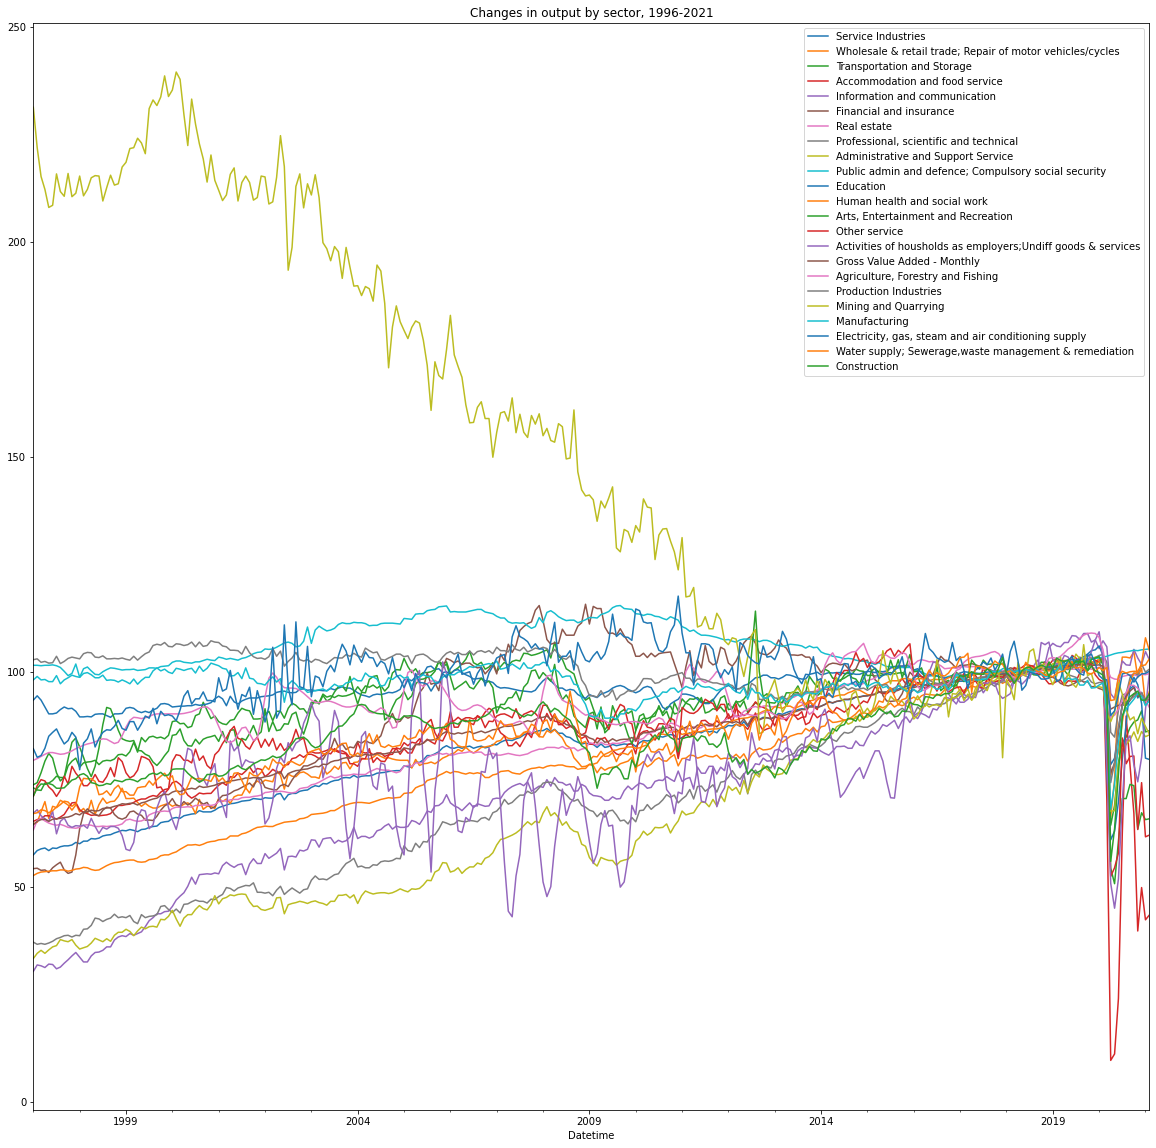

In [129]:
df2.plot(figsize=(20,20),title='Changes in output by sector, 1996-2021')

## Making charts
* Planning to find the largest contributors to total output - should just average them
* Also could make pie chart to see which are the largest contributors

In [130]:
means = df2.mean(axis=0)

In [131]:
means.index

Index(['Service Industries',
       'Wholesale & retail trade; Repair of motor vehicles/cycles',
       'Transportation and Storage', 'Accommodation and food service',
       'Information and communication', 'Financial and insurance',
       'Real estate', 'Professional, scientific and technical',
       'Administrative and Support Service',
       'Public admin and defence; Compulsory social security', 'Education',
       'Human health and social work', 'Arts, Entertainment and Recreation',
       'Other service',
       'Activities of housholds as employers;Undiff goods & services',
       'Gross Value Added - Monthly', 'Agriculture, Forestry and Fishing',
       'Production Industries', 'Mining and Quarrying', 'Manufacturing',
       'Electricity, gas, steam and air conditioning supply',
       'Water supply; Sewerage,waste management & remediation',
       'Construction'],
      dtype='object')

In [132]:
means.values

array([ 82.86310345,  82.70034483,  93.47896552,  84.03931034,
        72.14827586,  91.77034483,  84.41758621,  69.89413793,
        65.92034483, 106.08793103,  95.89413793,  79.83689655,
        91.86241379,  87.2862069 ,  77.57241379,  85.40551724,
        93.65103448, 100.25689655, 149.15068966,  97.14551724,
        99.15517241,  86.10206897,  85.71448276])

In [133]:
means_labels = means.index
means_values = means.values

In [134]:
# Let's compare four - service industries, human health and social work activites, manufacturing, and construction
df3 = pd.concat([df2['Service Industries'], df2['Human health and social work'], 
                 df2['Manufacturing'],  df2['Construction']], axis=1)

In [135]:
df3 # Same problem with floating header row, probably because Datetime has been set as the index

,Service Industries,Human health and social work,Manufacturing,Construction
Datetime,,,,
1997-01-01,57.4,52.6,98.1,71.1
1997-02-01,58.4,53.1,98.9,72.9
1997-03-01,58.8,53.4,98.1,73.9
1997-04-01,59.0,53.5,98.2,73.8
1997-05-01,58.4,53.6,97.7,74.0
...,...,...,...,...
2020-10-01,96.8,99.6,93.6,94.9
2020-11-01,93.9,99.8,94.9,95.5
2020-12-01,95.2,101.9,94.3,93.4


In [136]:
df3.reset_index()

,Datetime,Service Industries,Human health and social work,Manufacturing,Construction
0,1997-01-01,57.4,52.6,98.1,71.1
1,1997-02-01,58.4,53.1,98.9,72.9
2,1997-03-01,58.8,53.4,98.1,73.9
3,1997-04-01,59.0,53.5,98.2,73.8
4,1997-05-01,58.4,53.6,97.7,74.0
...,...,...,...,...,...
285,2020-10-01,96.8,99.6,93.6,94.9
286,2020-11-01,93.9,99.8,94.9,95.5
287,2020-12-01,95.2,101.9,94.3,93.4
288,2021-01-01,92.9,107.9,92.1,93.4


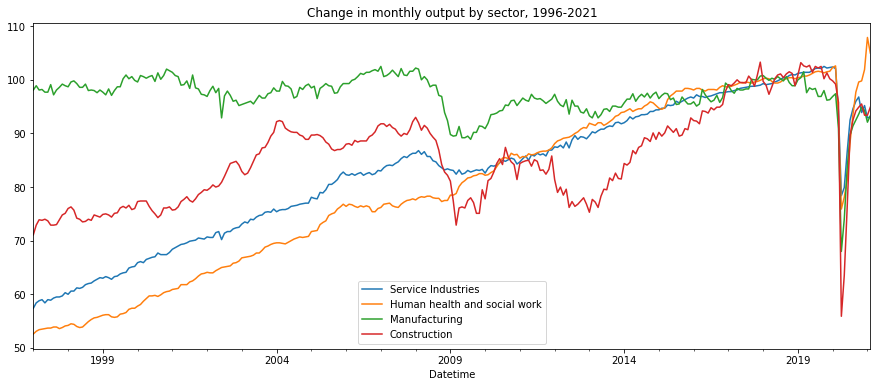

In [137]:
df3.plot(figsize=(15,6),title="Change in monthly output by sector, 1996-2021")

In [138]:
# Two main ways of plotting: 
# Object-oriented - explicitly creating figures and axes and calling ax.plot, ax1.plot etc
# Pyplot - relying on pyplot to create the figure and axes, and just calling plt.plot()

In [139]:
total_of_indices = df2.sum(axis=1)

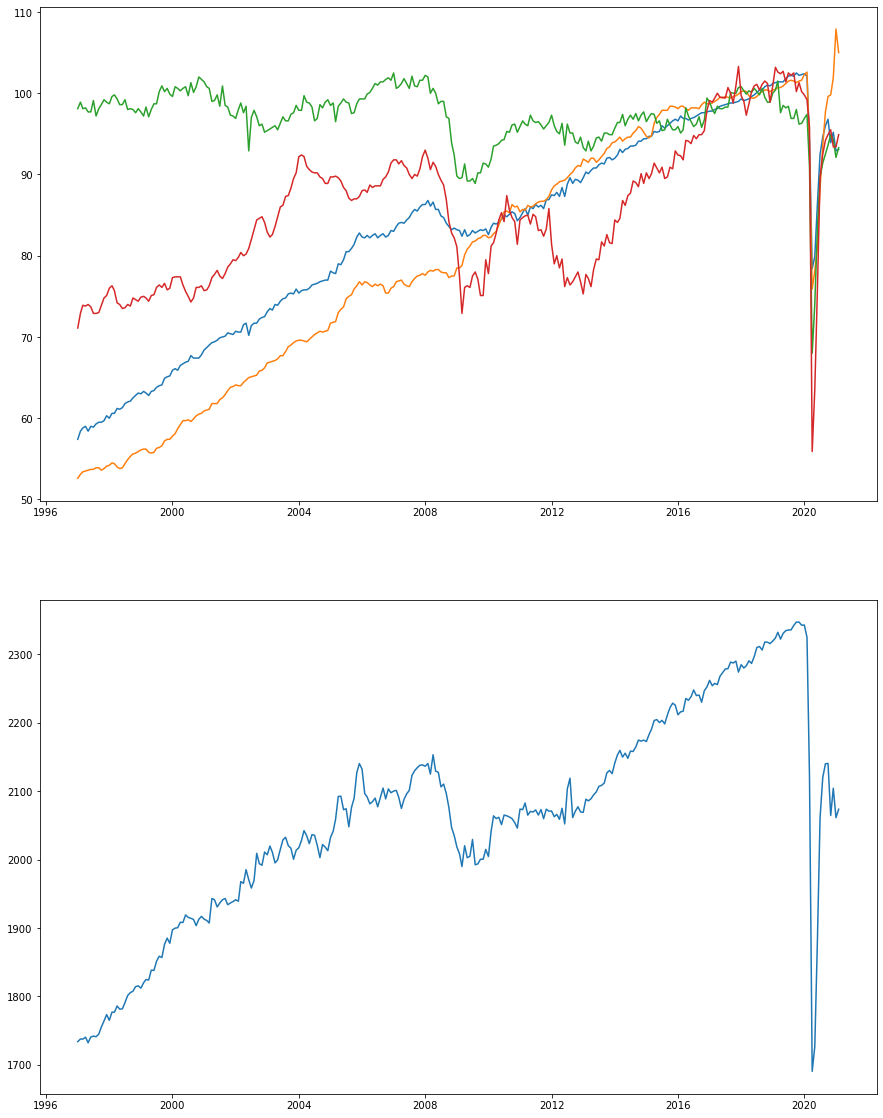

In [140]:
# Two main ways to make a chart: fig = plt.figure() and add subplots later; or fig, ax = plt.subplots()

fig, axs = plt.subplots(2,2,figsize=(15,20))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df3)
ax2 = plt.subplot(2, 1, 2)
ax2.plot(total_of_indices)

plt.show() # Doing this hides all the unnecessary variables 

## Comparing averages for the years 1999, 2009, and 2019

### Method 1. Using a Boolean mask

In [141]:
import datetime

In [142]:
%time
df_1999_boolean = (df2.index > datetime.datetime(1999, 1, 1)) & (df2.index < datetime.datetime(2000, 1, 1))
df_2009_boolean = (df2.index > datetime.datetime(2009, 1, 1)) & (df2.index < datetime.datetime(2010, 1, 1))
df_2019_boolean = (df2.index > datetime.datetime(2019, 1, 1)) & (df2.index < datetime.datetime(2020, 1, 1)) 

df_1999_b = df2[df_1999_boolean] # Calling this _b for Boolean
df_2009_b = df2[df_2009_boolean]
df_2019_b = df2[df_2019_boolean]

df_b = pd.concat([df_1999_b.mean(), df_2009_b.mean(), df_2019_b.mean()], axis=1) # df_b as it is based on Booleans

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs


### Method 2: Querying the dataframe directly

In [143]:
%time
df_1999_d = df2.loc[datetime.datetime(1999, 1, 1):datetime.datetime(2000, 1, 1)]
df_2009_d = df2.loc[datetime.datetime(2009, 1, 1):datetime.datetime(2010, 1, 1)]
df_2019_d = df2.loc[datetime.datetime(2019, 1, 1):datetime.datetime(2020, 1, 1)]
df_d = pd.concat( [df_1999_d.mean(), df_2009_d.mean(), df_2019_d.mean()], axis=1)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs


### Proceeding with Boolean mask

In [144]:
df_b.head()

,0,1,2
Service Industries,63.909091,82.927273,101.881818
Wholesale & retail trade; Repair of motor vehicles/cycles,69.218182,78.154545,102.509091
Transportation and Storage,83.954545,89.409091,101.745455
Accommodation and food service,70.927273,82.854545,102.436364
Information and communication,41.627273,71.227273,107.427273


In [145]:
df_b = df_b.rename(columns={0:"1999",1:"2009",2:"2019"})
df_b = df_b.swapaxes(axis1="index",axis2="columns")

In [146]:
df_b.head()

,Service Industries,Wholesale & retail trade; Repair of motor vehicles/cycles,Transportation and Storage,Accommodation and food service,Information and communication,Financial and insurance,Real estate,"Professional, scientific and technical",Administrative and Support Service,Public admin and defence; Compulsory social security,...,Other service,Activities of housholds as employers;Undiff goods & services,Gross Value Added - Monthly,"Agriculture, Forestry and Fishing",Production Industries,Mining and Quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; Sewerage,waste management & remediation",Construction
1999,63.909091,69.218182,83.954545,70.927273,41.627273,67.018182,66.463636,43.490909,40.781818,100.800000,...,76.045455,66.154545,70.200000,89.654545,104.790909,228.454545,99.072727,89.090909,73.845455,75.590909
2009,82.927273,78.154545,89.409091,82.854545,71.227273,110.281818,83.409091,66.436364,56.054545,114.127273,...,89.181818,59.636364,84.127273,88.427273,94.763636,135.336364,90.027273,106.945455,80.681818,76.463636
2019,101.881818,102.509091,101.745455,102.436364,107.427273,97.290909,100.627273,102.163636,102.536364,102.200000,...,99.027273,102.536364,101.463636,106.563636,98.709091,99.290909,98.081818,101.136364,100.536364,101.927273


In [147]:
# Now looking for the biggest five movements
df_b_changes = df_b.iloc[2,:] - df_b.iloc[0,:]
df_b_changes # Looks correct for the first few variables

Service Industries                                               37.972727
Wholesale & retail trade; Repair of motor vehicles/cycles        33.290909
Transportation and Storage                                       17.790909
Accommodation and food service                                   31.509091
Information and communication                                    65.800000
Financial and insurance                                          30.272727
Real estate                                                      34.163636
Professional, scientific and technical                           58.672727
Administrative and Support Service                               61.754545
Public admin and defence; Compulsory social security              1.400000
Education                                                        11.663636
Human health and social work                                     44.727273
Arts, Entertainment and Recreation                               20.318182
Other service            

In [148]:
# Sorting this list by the largest magnitude values, highest first
biggest_changes = df_b_changes.abs().sort_values(ascending=False)[0:5]
# Setting mining back to being a negative value (this is quite janky)
biggest_changes[0] = -biggest_changes[0]
biggest_changes[0] # Checking the largest value has been set back to negative correctly

-129.16363636363639

In [149]:
biggest_changes

Mining and Quarrying                     -129.163636
Information and communication              65.800000
Administrative and Support Service         61.754545
Professional, scientific and technical     58.672727
Human health and social work               44.727273
dtype: float64

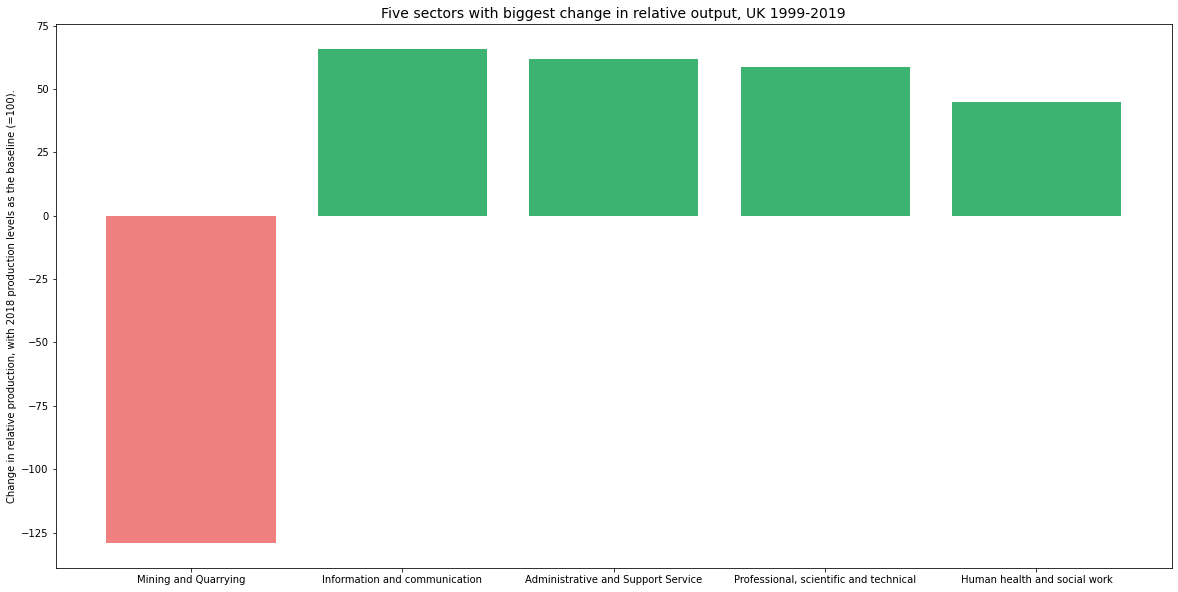

In [150]:
import matplotlib.pyplot as plt

x = biggest_changes.index
amounts = biggest_changes.values

fig, ax = plt.subplots(figsize=(20,10))

ax = plt.bar(x, amounts, color=['lightcoral','mediumseagreen','mediumseagreen','mediumseagreen','mediumseagreen'])
ax = plt.title('Five sectors with biggest change in relative output, UK 1999-2019',size=14)
ax = plt.ylabel('Change in relative production, with 2018 production levels as the baseline (=100).')
ax = plt.xticks(rotation=0)

## Grouping the sectors, e.g. having 3-7 so the graph is easier to read


Five groupings on p.10 here
https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/34607/12-1140-industrial-strategy-uk-sector-analysis.pdf

1. Low-medium tech manufacturing: food, metal, shipbuilding
2. Med-high tech manufacturing: chemicals, machinery, pharmaceuticals, ICT and precision instruments
3. Other production: agriculture, mining, utilities, construction
4. Knowledge services: communications, financial and business services, research and development, education
5. Other services: hotel and restaurants, retail, transport, health and social care

In [151]:
df2.head()

,Service Industries,Wholesale & retail trade; Repair of motor vehicles/cycles,Transportation and Storage,Accommodation and food service,Information and communication,Financial and insurance,Real estate,"Professional, scientific and technical",Administrative and Support Service,Public admin and defence; Compulsory social security,...,Other service,Activities of housholds as employers;Undiff goods & services,Gross Value Added - Monthly,"Agriculture, Forestry and Fishing",Production Industries,Mining and Quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; Sewerage,waste management & remediation",Construction
Datetime,,,,,,,,,,,,,,,,,,,,,
1997-01-01,57.4,64.6,73.0,65.2,30.3,54.2,63.2,37.1,33.3,101.5,...,71.0,67.1,64.4,79.4,102.8,231.3,98.1,82.1,67.0,71.1
1997-02-01,58.4,65.0,72.5,65.6,31.8,54.3,65.4,36.6,34.5,101.5,...,73.5,67.9,65.2,79.8,103.0,221.9,98.9,80.1,67.2,72.9
1997-03-01,58.8,67.4,72.4,65.8,31.6,53.8,65.9,36.8,35.2,101.4,...,74.9,66.5,65.6,80.3,102.2,215.2,98.1,80.5,67.9,73.9
1997-04-01,59.0,69.8,74.1,66.5,31.2,53.9,65.3,36.6,34.5,101.5,...,74.6,65.8,65.7,80.8,102.4,212.2,98.2,82.2,67.7,73.8
1997-05-01,58.4,65.9,74.1,66.5,32.0,53.3,64.8,36.9,35.3,101.5,...,73.2,65.2,65.2,81.2,102.0,208.0,97.7,85.0,67.2,74.0


In [196]:
index_groups = index_titles
index_groups = index_groups.rename(columns={'Unit':"Group"})
index_groups

,Title,Group
1,Service Industries,Index 1dp
2,Wholesale & retail trade; Repair of motor vehi...,Index 1dp
3,Transportation and Storage,Index 1dp
4,Accommodation and food service,Index 1dp
5,Information and communication,Index 1dp
6,Financial and insurance,Index 1dp
7,Real estate,Index 1dp
8,"Professional, scientific and technical",Index 1dp
9,Administrative and Support Service,Index 1dp
10,Public admin and defence; Compulsory social se...,Index 1dp


In [206]:
index_groups['Group'][1,5,6,7,8,9] = 'Services and professional'
index_groups['Group'][2,4,14] = 'Shopping and hospitality'
index_groups['Group'][3,24,25,27,28,30,32,36] = 'Manufacturing, industrial, construction'
index_groups['Group'][10,12,13,15,16,34] = 'Public services and other'

In [207]:
index_groups

,Title,Group
1,Service Industries,Services and professional
2,Wholesale & retail trade; Repair of motor vehi...,Shopping and hospitality
3,Transportation and Storage,"Manufacturing, industrial, construction"
4,Accommodation and food service,Shopping and hospitality
5,Information and communication,Services and professional
6,Financial and insurance,Services and professional
7,Real estate,Services and professional
8,"Professional, scientific and technical",Services and professional
9,Administrative and Support Service,Services and professional
10,Public admin and defence; Compulsory social se...,Public services and other
